<a href="https://colab.research.google.com/github/chirudeepnamini/Cracker/blob/main/Copy_of_crack_working.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"chirudeepnamini","key":"3cd038f169a291b5e770c8af5955e4f3"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d chirudeepnamini/crackdata
import zipfile
zip_ref = zipfile.ZipFile('crackdata.zip','r')
zip_ref.extractall()
zip_ref.close()

 98% 230M/234M [00:03<00:00, 64.2MB/s]
100% 234M/234M [00:03<00:00, 81.2MB/s]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

In [ ]:
import tensorflow
classifier = Sequential()

classifier.add(Conv2D(32,(3,3),input_shape=(227,227,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2)) #if stride not given it equal to pool filter size
classifier.add(Conv2D(16,(3,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2))
classifier.add(Flatten())
classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dense(units=1,activation='sigmoid'))
adam = tensorflow.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
classifier.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

#Training Set
train_set = train_datagen.flow_from_directory('/content/crackdata/train',
                                             target_size=(227,227),
                                             batch_size=50,
                                             class_mode='binary')
#Validation Set
test_set = test_datagen.flow_from_directory('/content/crackdata/test',
                                           target_size=(227,227),
                                           batch_size = 50,
                                           class_mode='binary',
                                           shuffle=False)

Found 38000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
classifier.fit(train_set,
                        steps_per_epoch=80, 
                        epochs = 5,
                        validation_data = test_set,
                        validation_steps = 20, 
                        #callbacks=[tensorboard]
                        );

Epoch 1/5
80/80 [==============================] - 76s 540ms/step - loss: 0.9139 - accuracy: 0.6400 - val_loss: 0.1561 - val_accuracy: 0.9260
Epoch 2/5
80/80 [==============================] - 43s 538ms/step - loss: 0.2089 - accuracy: 0.9455 - val_loss: 0.1130 - val_accuracy: 0.9390
Epoch 3/5
80/80 [==============================] - 43s 540ms/step - loss: 0.1878 - accuracy: 0.9571 - val_loss: 0.0191 - val_accuracy: 0.9940
Epoch 4/5
80/80 [==============================] - 43s 539ms/step - loss: 0.0970 - accuracy: 0.9723 - val_loss: 0.0369 - val_accuracy: 0.9840
Epoch 5/5
80/80 [==============================] - 43s 539ms/step - loss: 0.0602 - accuracy: 0.9826 - val_loss: 0.3163 - val_accuracy: 0.8770


In [ ]:
classifier.save('crackmodelworking.h5')

In [ ]:
from tensorflow.keras.models import load_model
classifier=load_model('crackmodelworking.h5')

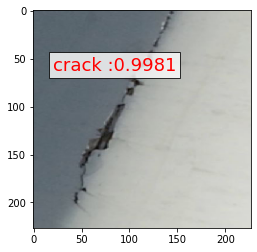

In [ ]:
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img1 = image.load_img('/content/cracked4.JPG', target_size=(227,227))
img = image.img_to_array(img1)
img = img/255
# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
prediction = classifier.predict(img, batch_size=None,steps=1) #gives all class prob.
if(prediction[:,:]>0.5):
    value ='no crack :%2.4f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='crack :%2.4f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

plt.imshow(img1)
plt.show()

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/crackimgs.zip','r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
import os
import cv2
import tensorflow
file1 = open("MyFile.txt","a")
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
classifier=load_model('crackmodelworking.h5')
dirs = os.listdir('/content/crackimgs')
for file in dirs:
  filename='/content/crackimgs/'+file
  img1 = image.load_img(filename, target_size=(227,227))
  img = image.img_to_array(img1)
  img = img/255
  img = np.expand_dims(img, axis=0)
  prediction = classifier.predict(img, batch_size=None,steps=1)
  if(prediction[:,:]>0.5):
    value ='no cracks--{:2.1f}%'.format(100*prediction[0,0])
  else:
    value ='cracks--{:2.1f}%'.format((1.0-prediction[0,0])*100)
  res=file+'----'+value+'\n'
  file1.write(res)
file1.close()


In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(classifier)
tflite_model = converter.convert()

# Save the model.
with open('crack_model_lite.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp0kjg8r63/assets


INFO:tensorflow:Assets written to: /tmp/tmp0kjg8r63/assets


In [ ]:
import tensorflow as tf

# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model('/content') # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('crack_model_lite.tflite', 'wb') as f:
  f.write(tflite_model)


OSError: ignored

In [ ]:
img = np.reshape(img,[1,227,227,3])

In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
#img1 = image.load_img('/content/2.png')
img1=cv2.imread('/content/2.png')
i=0
j=0
print(img1.shape)
while j<img1.shape[1]:
  i=0
  while i<img1.shape[0]:
    imagecropped=img1[i:i+200,j:j+200, : ]
    img = cv2.resize(imagecropped,(227,227))
    
    img = image.img_to_array(img)
    img = img/255
    img = np.expand_dims(img, axis=0)
    prediction = classifier.predict(img, batch_size=None,steps=1)
    print(i,j,i+199,j+199)
    if prediction[:,:]>0.5:
      #no crack #black
      cv2.rectangle(img1, pt1 = (i, j), pt2 = (i + 199, j + 199), color =(0,255,0), thickness = 1)
    else:
      #crack #white
      cv2.rectangle(img1, pt1 = (i, j), pt2 = (i + 199, j + 199), color =(255,255,255), thickness = 1)
    i=i+200
  j=j+200

cv2_imshow(img1)

(1080, 1920, 3)
0 0 199 199
200 0 399 199
400 0 599 199
600 0 799 199
800 0 999 199
1000 0 1199 199
0 200 199 399
200 200 399 399
400 200 599 399
600 200 799 399
800 200 999 399
1000 200 1199 399
0 400 199 599
200 400 399 599
400 400 599 599
600 400 799 599
800 400 999 599
1000 400 1199 599
0 600 199 799
200 600 399 799
400 600 599 799
600 600 799 799
800 600 999 799
1000 600 1199 799
0 800 199 999
200 800 399 999
400 800 599 999
600 800 799 999
800 800 999 999
1000 800 1199 999
0 1000 199 1199
200 1000 399 1199
400 1000 599 1199
600 1000 799 1199
800 1000 999 1199
1000 1000 1199 1199


error: ignored

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


def chunkify(img, block_width=200, block_height=200):
    shape = img.shape
    x_len = shape[0]//block_width
    y_len = shape[1]//block_height
    #print(x_len, y_len)
    
    chunks = []
    x_indices = [i for i in range(0, shape[0]+1, block_width)]
    y_indices = [i for i in range(0, shape[1]+1, block_height)]

    shapes = list(zip(x_indices, y_indices))
    
    for i in range(len(shapes)):
        try:
            start_x = shapes[i][0]
            start_y = shapes[i][1]
            end_x = shapes[i+1][0]
            end_y = shapes[i+1][1]
            print(start_x,start_y,end_x,end_y)
            imagecropped=img[start_x:end_x][start_y:end_y]
            img = cv2.resize(imagecropped,(227,227))
            img = image.img_to_array(img)
            img = img/255
            img = np.expand_dims(img, axis=0)
            prediction = classifier.predict(img, batch_size=None,steps=1)
            if prediction[:,:]>0.5:
      #no crack #black
              cv2.rectangle(img, pt1 = (i, j), pt2 = (i + 199, j + 199), color =(0,255,0), thickness = 1)
            else:
      #crack #white
              cv2.rectangle(img, pt1 = (i, j), pt2 = (i + 199, j + 199), color =(255,255,255), thickness = 1)
        except IndexError:
            print('End of Array')
    cv2_imshow(img)
    
img = Image.open('/content/2.png')
img = np.array(img)

blocks = chunkify(img)


0 0 200 200
200 200 400 400


error: ignored